# MLB Poptime analysis

## Ivan Quackenbush

## Git Hub Repo: https://github.com/Quackman21/D7-Final-project

#### The goal of this project is to show what the makeup of the MLB pop time is and what impact of the variables are.


#### Installs 

In [1]:
pip install pandas matplotlib seaborn plotly pandasql mpld3


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/f3/ed/c27530b520a1497a8c028025fa7eae56589d8aac11c41ec599cbd26e9077/SQLAlchemy-2.0.19-cp37-cp37m-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.1/240.1 kB 5.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=8e980d0ff50c2e3c88e9499769d4a491e961680e154ef2a2103323d4c47ea610
  Stored in directory: /Users

#### Cordination between throwing velocity and average pop time by player in the MLB

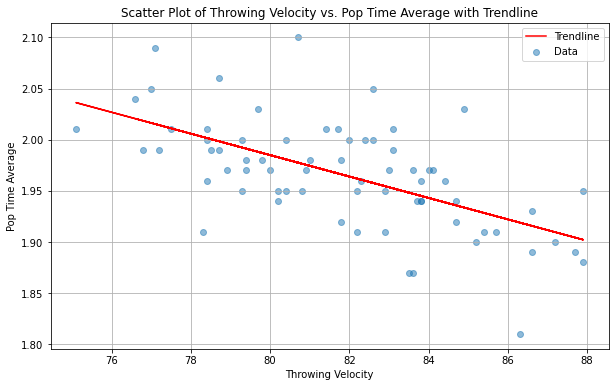

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

data = pd.read_csv("poptime.csv")

throwing_velocity = data["maxeff_arm_2b_3b_sba"]
pop_time_average = data["pop_2b_sba"]

slope, intercept, r_value, p_value, std_err = linregress(throwing_velocity, pop_time_average)
regression_line = slope * throwing_velocity + intercept

plt.figure(figsize=(10, 6))
plt.scatter(throwing_velocity, pop_time_average, alpha=0.5, label="Data")
plt.plot(throwing_velocity, regression_line, color='red', label="Trendline")
plt.title("Scatter Plot of Throwing Velocity vs. Pop Time Average with Trendline")
plt.xlabel("Throwing Velocity")
plt.ylabel("Pop Time Average")
plt.legend()
plt.grid(True)
plt.show()



#### As you can see there is a direct correlation between the throwing velocity and the pop time to second base. The trendline trends downward as the velocity increases.

#### If you were to split the MLB into 3 tiers of pop time (upper, middle, bottom) what would be the biggest contributer to thier pop time.

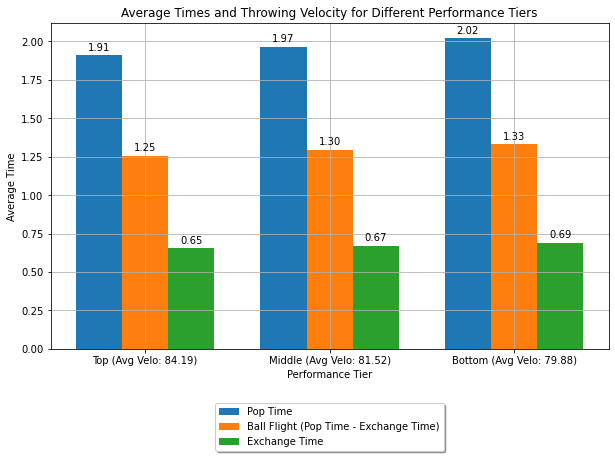

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("poptime.csv")

# Calculate top, middle, and bottom thresholds for pop time
num_rows = len(data)
top_threshold = int(num_rows * 0.33)
middle_threshold = int(num_rows * 0.66)

# Sort data by pop time average
data_sorted = data.sort_values(by="pop_2b_sba")

# Separate data into top, middle, and bottom thirds
top_third = data_sorted[:top_threshold]
middle_third = data_sorted[top_threshold:middle_threshold]
bottom_third = data_sorted[middle_threshold:]

# Calculate average times
avg_top_pop_time = top_third["pop_2b_sba"].mean()
avg_middle_pop_time = middle_third["pop_2b_sba"].mean()
avg_bottom_pop_time = bottom_third["pop_2b_sba"].mean()

avg_top_ball_flight = (top_third["pop_2b_sba"] - top_third["exchange_2b_3b_sba"]).mean()
avg_middle_ball_flight = (middle_third["pop_2b_sba"] - middle_third["exchange_2b_3b_sba"]).mean()
avg_bottom_ball_flight = (bottom_third["pop_2b_sba"] - bottom_third["exchange_2b_3b_sba"]).mean()

avg_top_exchange_time = top_third["exchange_2b_3b_sba"].mean()
avg_middle_exchange_time = middle_third["exchange_2b_3b_sba"].mean()
avg_bottom_exchange_time = bottom_third["exchange_2b_3b_sba"].mean()

# Calculate average throwing velocity
avg_top_throwing_velocity = top_third["maxeff_arm_2b_3b_sba"].mean()
avg_middle_throwing_velocity = middle_third["maxeff_arm_2b_3b_sba"].mean()
avg_bottom_throwing_velocity = bottom_third["maxeff_arm_2b_3b_sba"].mean()

# Bar graph
categories = ["Top", "Middle", "Bottom"]
pop_time_values = [avg_top_pop_time, avg_middle_pop_time, avg_bottom_pop_time]
ball_flight_values = [avg_top_ball_flight, avg_middle_ball_flight, avg_bottom_ball_flight]
exchange_time_values = [avg_top_exchange_time, avg_middle_exchange_time, avg_bottom_exchange_time]

x = np.arange(len(categories))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, pop_time_values, width, label="Pop Time")
plt.bar(x, ball_flight_values, width, label="Ball Flight (Pop Time - Exchange Time)")
plt.bar(x + width, exchange_time_values, width, label="Exchange Time")

# Add data labels to the bar graph columns
for i, value in enumerate(pop_time_values):
    plt.text(i - width, value + 0.02, f"{value:.2f}", ha='center', va='bottom')
for i, value in enumerate(ball_flight_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')
for i, value in enumerate(exchange_time_values):
    plt.text(i + width, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.xlabel("Performance Tier")
plt.ylabel("Average Time")
plt.title("Average Times and Throwing Velocity for Different Performance Tiers")
plt.xticks(x, categories)

# Add average throwing velocity to the labels
labels = [
    f"Top (Avg Velo: {avg_top_throwing_velocity:.2f})",
    f"Middle (Avg Velo: {avg_middle_throwing_velocity:.2f})",
    f"Bottom (Avg Velo: {avg_bottom_throwing_velocity:.2f})"
]

plt.gca().set_xticklabels(labels)

# Move the legend outside the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)

plt.grid(True)
plt.show()



#### As exchange time and ball flight decrase so does the MLB pop time. As you divide it into teirs the time decreases substantically from the middle to the top tier.

#### How much more important is throwing velocity than exchange time when trying to influence pop time

In [42]:
import pandas as pd

data = pd.read_csv("poptime.csv")

# Select only the relevant columns for 2b
data_2b = data[["maxeff_arm_2b_3b_sba", "pop_2b_sba", "exchange_2b_3b_sba"]]

# Calculate correlation coefficients
correlation_throw_pop = data_2b["maxeff_arm_2b_3b_sba"].corr(data_2b["pop_2b_sba"])
correlation_exchange_pop = data_2b["exchange_2b_3b_sba"].corr(data_2b["pop_2b_sba"])

# Calculate the ratio of the absolute values of the correlation coefficients
importance_ratio = abs(correlation_throw_pop) / abs(correlation_exchange_pop)

# Display the results
print(f"Correlation between Throwing Velocity and Pop Time: {correlation_throw_pop:.4f}")
print(f"Correlation between Exchange Time and Pop Time: {correlation_exchange_pop:.4f}")

if importance_ratio > 1:
    print(f"The stronger negative correlation for throwing velocity indicates that increasing throwing velocity has approximately {importance_ratio:.2f} times more impact on reducing pop time compared to decreasing exchange time.")
else:
    print(f"Both throwing velocity and exchange time have negative correlations with pop time. The importance ratio is approximately {importance_ratio:.2f}, indicating that both factors contribute to reducing pop time.")


Correlation between Throwing Velocity and Pop Time: -0.6083
Correlation between Exchange Time and Pop Time: 0.4618
The stronger negative correlation for throwing velocity indicates that increasing throwing velocity has approximately 1.32 times more impact on reducing pop time compared to decreasing exchange time.


##### The results illustrate that when training catchers to maximize their pop time potneital and get the lowest result possile, it is substantially more important to work on throwing velocity than exchange time